#Dependencies

In [1]:
!pip install python-sat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Imports

In [86]:
from pysat.solvers import Minisat22
import random
from itertools import combinations
from colorama import Fore
from tabulate import tabulate
import emoji
import matplotlib.pyplot as plt
from IPython import display 

#Part3:

##$$Modelling:$$

In [5]:
def IN(n,r,c):
    return n*length**2 + r*length + c + 1
def findsubsets(s, n):
    return list(map(list, combinations(s, n)))

In [19]:
def logic_modelling(n):
  #Game Setting
  global length 
  length = n + 2
  size = length**2
  states = [i for i in range(11)]
  pairToDecimal = {(i,j):i*length + j for i in range(length) for j in range(length)}
  decimalToPair = {i:(i//length, i%length) for i in range(length*length)}
  #Initialization
  mine_sw = Minisat22()
  #The first rule
  j=1
  for c in range(length):
    clause = [IN(9, 0, c)]
    print(j,"=>","adding",clause)
    mine_sw.add_clause(clause)
    j+=1
  #The second rule
  for r in range(1, length):
    clause = [IN(9, r, 0)]
    print(j,"=>","adding",clause)
    mine_sw.add_clause(clause)
    j+=1
  #The third rule
  for c in range(1, length):
    clause = [IN(9, length-1, c)]
    print(j,"=>","adding",clause)
    mine_sw.add_clause(clause)
    j+=1
  #The fourth rule
  for r in range(1, length-1):
    clause = [IN(9, r, length-1)]
    print(j,"=>","adding",clause)
    mine_sw.add_clause(clause)
    j+=1
  #The fifth rule
  for r in range(1, length-1):
    for c in range(1, length-1):
      clause = [-IN(9, r, c)]
      print(j,"=>","adding",clause)
      mine_sw.add_clause(clause)
      j+=1
  #The sixth rule
  for r in range(length):
    for c in range(length):
      for s1 in range(len(states)):
        for s2 in range(s1+1, len(states)):
          st1, st2 = states[s1], states[s2]
          clause = [-IN(st1, r, c), -IN(st2, r, c)]
          print(j,"=>","adding",clause)
          mine_sw.add_clause(clause)
          j+=1
  #The seventh rule
  for r in range(1,length-1):
    for c in range(1,length-1):
      for Radj in range(r-1,r+2):
        for Cadj in range(c-1,c+2):
          if (r,c) != (Radj, Cadj):
            clause = [-IN(0,r,c), -IN(10,Radj,Cadj)]
          else: continue
          print(j,"=>","adding",clause)
          mine_sw.add_clause(clause)
          j+=1
  #The eighth rule
  BombNumber = 1
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(1,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1

  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(1,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  #The ninth rule
  BombNumber = 2
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(2,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1

  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(2,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  #The tenth rule
  BombNumber = 3
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(3,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1

  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(3,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  #The eveventh rule
  BombNumber = 4
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(4,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1

  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(4,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  #The twelf rule
  BombNumber = 5
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(5,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(5,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  #The 13rd rule
  BombNumber = 6
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(6,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1

  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(6,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  #The 14th rule
  BombNumber = 7
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(7,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1

  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(7,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1
  #The 15th rule
  BombNumber = 8
  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = 9 - BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(8,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
        j+=1

  for r in range(1, length-1):
    for c in range(1, length-1):
      surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
      cells = [pairToDecimal[el] for el in surrounding]
      subsize = BombNumber + 1
      SOSK = findsubsets(cells, subsize)
      for subset in SOSK:
        clause = [-IN(8,r,c)]
        ps = [decimalToPair[dec] for dec in subset] 
        for rc in ps:
          R,C = rc
          clause.append(-IN(10,R,C))
        mine_sw.add_clause(clause)
        print(j,"=>","adding",clause)
  print(f"Total number of clauses: {j}")
  return (mine_sw, j)

##$$Game \: generator:$$

In [7]:
def cell_discovery(initial_matrix, model, verbose=True):

  initial_conf = []
  for i in range(len(initial_matrix)):
    for j in range(len(initial_matrix)):
      if initial_matrix[i][j] != None:
        initial_conf.append((initial_matrix[i][j],i,j))
  status = {}
  assumptions = [IN(*nrc) for nrc in initial_conf]
  if model.solve(assumptions=assumptions) == False:
    if verbose: print(Fore.RED + "The Configuration Is Not Valid...")
    return ""
  assumptions1, assumptions2 = assumptions.copy(), assumptions.copy()
  for Ridx in range(1,len(initial_matrix)-1):
    for Cidx in range(1,len(initial_matrix)-1):
      if initial_matrix[Ridx][Cidx] == None:
        new_config_s = IN(10,Ridx,Cidx) #Safe evaluator
        new_config_b = -IN(10,Ridx,Cidx) #Bomb evaluator
        assumptions1.append(new_config_s)
        assumptions2.append(new_config_b)
        if model.solve(assumptions=assumptions1) == False:
          status[(Ridx, Cidx)] = "Safe"
          if verbose: print(Fore.GREEN + f"{(Ridx, Cidx)}:Safe")
        elif model.solve(assumptions=assumptions2) == False:
          status[(Ridx, Cidx)] = "Bomb"
          if verbose: print(Fore.RED + f"{(Ridx, Cidx)}:Bomb")
        else:
          status[(Ridx, Cidx)] = "Unknown"
          if verbose: print(Fore.YELLOW + f"{(Ridx, Cidx)}:Unknown")
        assumptions1.pop(-1)
        assumptions2.pop(-1)
  if "Bomb" not in status.values() and "Safe" not in status.values() and "Unknown" in status.values():
    print(Fore.RED + "Cells Are All Unknown. Let's Make a Random Choice...")
  if "Bomb" not in status.values() and "Safe" not in status.values() and "Unknown" not in status.values():
    print(Fore.GREEN + "You win...")
  return status

In [8]:
def show(G):
  P = [[None for _ in range(length)] for _ in range(length)]
  for i in range(len(P)):
    for j in range(len(P)):
      P[i][j] = G[i][j]
      if P[i][j] == 10:
        P[i][j] = emoji.emojize(":triangular_flag:")
      if i==0 or i==n+1 or j==0 or j==n+1:
        P[i][j] = emoji.emojize(":cross_mark:")
  return P

In [9]:
def generate_new_configuration(initial_matrix, status):
  safes = [key for key in status if status[key]=='Safe']
  bombs = [key for key in status if status[key]=='Bomb']
  for sf_idx in safes:
    initial_matrix[sf_idx[0]][sf_idx[1]] = game[sf_idx[0]][sf_idx[1]]
    if game[sf_idx[0]][sf_idx[1]] == 10:
      print(Fore.RED + "you lose...")
      return (False,initial_matrix)
  for bmb_idx in bombs:
    initial_matrix[bmb_idx[0]][bmb_idx[1]] = 10
  return (True,initial_matrix)

##$$Game: 4 \: 𝚇 \: 4, \: 3 \: bombs $$

In [21]:
numberOfClauses = {}

In [22]:
n = 4
number_of_bombs = 3
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
13210 => adding [-206, -379, -380, -381, -385, -392, -393]
13211 => adding [-206, -379, -380, -381, -386, -387, -391]
13212 => adding [-206, -379, -380, -381, -386, -387, -392]
13213 => adding [-206, -379, -380, -381, -386, -387, -393]
13214 => adding [-206, -379, -380, -381, -386, -391, -392]
13215 => adding [-206, -379, -380, -381, -386, -391, -393]
13216 => adding [-206, -379, -380, -381, -386, -392, -393]
13217 => adding [-206, -379, -380, -381, -387, -391, -392]
13218 => adding [-206, -379, -380, -381, -387, -391, -393]
13219 => adding [-206, -379, -380, -381, -387, -392, -393]
13220 => adding [-206, -379, -380, -381, -391, -392, -393]
13221 => adding [-206, -379, -380, -385, -386, -387, -391]
13222 => adding [-206, -379, -380, -385, -386, -387, -392]
13223 => adding [-206, -379, -380, -385, -386, -387, -393]
13224 => adding [-206, -379, -380, -385, -386, -391, -392]
13225 => adding [-206, -379, -380, -385, -386, -391, -393]
13226

In [23]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [24]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (1, 1) was selected randomly...
╒════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
╘════╧════╧════╧════╧════╧════╛
╒════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │ 0  │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │ 1  │ 1  │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
╘════╧════╧════╧════╧════╧════╛
╒════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │ 0  │ 1  │    │ ❌ 

In [25]:
initial_matrix == game

True

##$$Game: 5 \: 𝚇 \: 5, \: 5 \: bombs $$

In [27]:
n = 5
number_of_bombs = 5
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
23046 => adding [-327, 515, 517, 529, 530]
23047 => adding [-327, 515, 517, 529, 531]
23048 => adding [-327, 515, 517, 530, 531]
23049 => adding [-327, 515, 522, 523, 524]
23050 => adding [-327, 515, 522, 523, 529]
23051 => adding [-327, 515, 522, 523, 530]
23052 => adding [-327, 515, 522, 523, 531]
23053 => adding [-327, 515, 522, 524, 529]
23054 => adding [-327, 515, 522, 524, 530]
23055 => adding [-327, 515, 522, 524, 531]
23056 => adding [-327, 515, 522, 529, 530]
23057 => adding [-327, 515, 522, 529, 531]
23058 => adding [-327, 515, 522, 530, 531]
23059 => adding [-327, 515, 523, 524, 529]
23060 => adding [-327, 515, 523, 524, 530]
23061 => adding [-327, 515, 523, 524, 531]
23062 => adding [-327, 515, 523, 529, 530]
23063 => adding [-327, 515, 523, 529, 531]
23064 => adding [-327, 515, 523, 530, 531]
23065 => adding [-327, 515, 524, 529, 530]
23066 => adding [-327, 515, 524, 529, 531]
23067 => adding [-327, 515, 524, 530, 531]
230

In [28]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [33]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (2, 1) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
╘════╧════╧════╧════╧════╧════╧════╛
╒════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │ 1  │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │ 2  │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 1  │ 3  │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼───

In [34]:
initial_matrix == game

True

##$$Game: 6 \: 𝚇 \: 6, \: 7 \: bombs $$

In [36]:
n = 6
number_of_bombs = 7
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
35018 => adding [-429, -676, -677, -678, -684, -685, -693, -694]
35019 => adding [-429, -676, -677, -678, -684, -686, -692, -693]
35020 => adding [-429, -676, -677, -678, -684, -686, -692, -694]
35021 => adding [-429, -676, -677, -678, -684, -686, -693, -694]
35022 => adding [-429, -676, -677, -678, -684, -692, -693, -694]
35023 => adding [-429, -676, -677, -678, -685, -686, -692, -693]
35024 => adding [-429, -676, -677, -678, -685, -686, -692, -694]
35025 => adding [-429, -676, -677, -678, -685, -686, -693, -694]
35026 => adding [-429, -676, -677, -678, -685, -692, -693, -694]
35027 => adding [-429, -676, -677, -678, -686, -692, -693, -694]
35028 => adding [-429, -676, -677, -684, -685, -686, -692, -693]
35029 => adding [-429, -676, -677, -684, -685, -686, -692, -694]
35030 => adding [-429, -676, -677, -684, -685, -686, -693, -694]
35031 => adding [-429, -676, -677, -684, -685, -692, -693, -694]
35032 => adding [-429, -676, -677, -684

In [37]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [42]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (4, 3) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │ 2  │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
╘════╧════╧════╧════╧════╧════╧════╧════╛
Cells Are All Unknown. Let's Make a Random Choice...
cell (6, 5) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │ 

In [43]:
initial_matrix == game

True

##$$Game: 7 \: 𝚇 \: 7, \: 8 \: bombs $$

In [44]:
n = 7
number_of_bombs = 8
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
49126 => adding [-598, 831, 850, 851]
49127 => adding [-598, 832, 833, 840]
49128 => adding [-598, 832, 833, 841]
49129 => adding [-598, 832, 833, 842]
49130 => adding [-598, 832, 833, 849]
49131 => adding [-598, 832, 833, 850]
49132 => adding [-598, 832, 833, 851]
49133 => adding [-598, 832, 840, 841]
49134 => adding [-598, 832, 840, 842]
49135 => adding [-598, 832, 840, 849]
49136 => adding [-598, 832, 840, 850]
49137 => adding [-598, 832, 840, 851]
49138 => adding [-598, 832, 841, 842]
49139 => adding [-598, 832, 841, 849]
49140 => adding [-598, 832, 841, 850]
49141 => adding [-598, 832, 841, 851]
49142 => adding [-598, 832, 842, 849]
49143 => adding [-598, 832, 842, 850]
49144 => adding [-598, 832, 842, 851]
49145 => adding [-598, 832, 849, 850]
49146 => adding [-598, 832, 849, 851]
49147 => adding [-598, 832, 850, 851]
49148 => adding [-598, 833, 840, 841]
49149 => adding [-598, 833, 840, 842]
49150 => adding [-598, 833, 840, 849]

In [45]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [46]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (1, 2) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │ 1  │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
╘════╧════╧════╧════╧════╧════╧════╧════╧════╛
Cells Are All Unknown. Let's Make a Random Choice

In [47]:
initial_matrix == game

True

##$$Game: 8 \: 𝚇 \: 8, \: 9 \: bombs $$

In [49]:
n = 8
number_of_bombs = 9
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
65370 => adding [-759, 1049, 1060, 1070]
65371 => adding [-759, 1049, 1068, 1069]
65372 => adding [-759, 1049, 1068, 1070]
65373 => adding [-759, 1049, 1069, 1070]
65374 => adding [-759, 1050, 1058, 1059]
65375 => adding [-759, 1050, 1058, 1060]
65376 => adding [-759, 1050, 1058, 1068]
65377 => adding [-759, 1050, 1058, 1069]
65378 => adding [-759, 1050, 1058, 1070]
65379 => adding [-759, 1050, 1059, 1060]
65380 => adding [-759, 1050, 1059, 1068]
65381 => adding [-759, 1050, 1059, 1069]
65382 => adding [-759, 1050, 1059, 1070]
65383 => adding [-759, 1050, 1060, 1068]
65384 => adding [-759, 1050, 1060, 1069]
65385 => adding [-759, 1050, 1060, 1070]
65386 => adding [-759, 1050, 1068, 1069]
65387 => adding [-759, 1050, 1068, 1070]
65388 => adding [-759, 1050, 1069, 1070]
65389 => adding [-759, 1058, 1059, 1060]
65390 => adding [-759, 1058, 1059, 1068]
65391 => adding [-759, 1058, 1059, 1069]
65392 => adding [-759, 1058, 1059, 1070]
65393 

In [50]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [51]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (1, 6) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │ 0  │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │


In [52]:
initial_matrix == game

True

##$$Game: 9 \: 𝚇 \: 9, \: 10 \: bombs $$

In [53]:
n = 9
number_of_bombs = 10
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
83750 => adding [-939, 1301, 1312, 1313]
83751 => adding [-939, 1301, 1312, 1314]
83752 => adding [-939, 1301, 1313, 1314]
83753 => adding [-939, 1302, 1303, 1312]
83754 => adding [-939, 1302, 1303, 1313]
83755 => adding [-939, 1302, 1303, 1314]
83756 => adding [-939, 1302, 1312, 1313]
83757 => adding [-939, 1302, 1312, 1314]
83758 => adding [-939, 1302, 1313, 1314]
83759 => adding [-939, 1303, 1312, 1313]
83760 => adding [-939, 1303, 1312, 1314]
83761 => adding [-939, 1303, 1313, 1314]
83762 => adding [-939, 1312, 1313, 1314]
83763 => adding [-940, 1291, 1292, 1293]
83764 => adding [-940, 1291, 1292, 1302]
83765 => adding [-940, 1291, 1292, 1303]
83766 => adding [-940, 1291, 1292, 1304]
83767 => adding [-940, 1291, 1292, 1313]
83768 => adding [-940, 1291, 1292, 1314]
83769 => adding [-940, 1291, 1292, 1315]
83770 => adding [-940, 1291, 1293, 1302]
83771 => adding [-940, 1291, 1293, 1303]
83772 => adding [-940, 1291, 1293, 1304]
83773 

In [54]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [55]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (3, 7) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │ 2  │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼──

In [56]:
initial_matrix == game

True

##$$Game: 10 \: 𝚇 \: 10, \: 13 \: bombs $$

In [57]:
n = 10
number_of_bombs = 13
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
104266 => adding [-1135, 1554, 1567, 1580]
104267 => adding [-1135, 1554, 1568, 1578]
104268 => adding [-1135, 1554, 1568, 1579]
104269 => adding [-1135, 1554, 1568, 1580]
104270 => adding [-1135, 1554, 1578, 1579]
104271 => adding [-1135, 1554, 1578, 1580]
104272 => adding [-1135, 1554, 1579, 1580]
104273 => adding [-1135, 1555, 1556, 1566]
104274 => adding [-1135, 1555, 1556, 1567]
104275 => adding [-1135, 1555, 1556, 1568]
104276 => adding [-1135, 1555, 1556, 1578]
104277 => adding [-1135, 1555, 1556, 1579]
104278 => adding [-1135, 1555, 1556, 1580]
104279 => adding [-1135, 1555, 1566, 1567]
104280 => adding [-1135, 1555, 1566, 1568]
104281 => adding [-1135, 1555, 1566, 1578]
104282 => adding [-1135, 1555, 1566, 1579]
104283 => adding [-1135, 1555, 1566, 1580]
104284 => adding [-1135, 1555, 1567, 1568]
104285 => adding [-1135, 1555, 1567, 1578]
104286 => adding [-1135, 1555, 1567, 1579]
104287 => adding [-1135, 1555, 1567, 1580]
104

In [58]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [62]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (4, 3) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │ 2  │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ 

In [63]:
initial_matrix == game

True

##$$Game: 15 \: 𝚇 \: 15, \: 35 \: bombs $$

In [64]:
n = 15
number_of_bombs = 35
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
238886 => adding [-2435, 2996, 3031]
238887 => adding [-2435, 2997, 3012]
238888 => adding [-2435, 2997, 3013]
238889 => adding [-2435, 2997, 3014]
238890 => adding [-2435, 2997, 3029]
238891 => adding [-2435, 2997, 3030]
238892 => adding [-2435, 2997, 3031]
238893 => adding [-2435, 3012, 3013]
238894 => adding [-2435, 3012, 3014]
238895 => adding [-2435, 3012, 3029]
238896 => adding [-2435, 3012, 3030]
238897 => adding [-2435, 3012, 3031]
238898 => adding [-2435, 3013, 3014]
238899 => adding [-2435, 3013, 3029]
238900 => adding [-2435, 3013, 3030]
238901 => adding [-2435, 3013, 3031]
238902 => adding [-2435, 3014, 3029]
238903 => adding [-2435, 3014, 3030]
238904 => adding [-2435, 3014, 3031]
238905 => adding [-2435, 3029, 3030]
238906 => adding [-2435, 3029, 3031]
238907 => adding [-2435, 3030, 3031]
238908 => adding [-2436, 2996, 2997]
238909 => adding [-2436, 2996, 2998]
238910 => adding [-2436, 2996, 3013]
238911 => adding [-2436,

In [65]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [71]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (14, 15) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──

In [72]:
initial_matrix == game

True

##$$Game: 20 \: 𝚇 \: 20, \: 60 \: bombs $$

In [73]:
n = 20
number_of_bombs = 60
model, number_of_clauses = logic_modelling(n)
numberOfClauses[f"{str(n)}x{str(n)}"] = number_of_clauses

Streaming output truncated to the last 5000 lines.
426906 => adding [-4194, 5140, 5161]
426907 => adding [-4194, 5140, 5162]
426908 => adding [-4194, 5140, 5163]
426909 => adding [-4194, 5140, 5183]
426910 => adding [-4194, 5140, 5184]
426911 => adding [-4194, 5140, 5185]
426912 => adding [-4194, 5141, 5161]
426913 => adding [-4194, 5141, 5162]
426914 => adding [-4194, 5141, 5163]
426915 => adding [-4194, 5141, 5183]
426916 => adding [-4194, 5141, 5184]
426917 => adding [-4194, 5141, 5185]
426918 => adding [-4194, 5161, 5162]
426919 => adding [-4194, 5161, 5163]
426920 => adding [-4194, 5161, 5183]
426921 => adding [-4194, 5161, 5184]
426922 => adding [-4194, 5161, 5185]
426923 => adding [-4194, 5162, 5163]
426924 => adding [-4194, 5162, 5183]
426925 => adding [-4194, 5162, 5184]
426926 => adding [-4194, 5162, 5185]
426927 => adding [-4194, 5163, 5183]
426928 => adding [-4194, 5163, 5184]
426929 => adding [-4194, 5163, 5185]
426930 => adding [-4194, 5183, 5184]
426931 => adding [-4194,

In [74]:
game = [[None for _ in range(length)] for _ in range(length)]
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = 10

adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

STATUS = cell_discovery(game, model)

You win...


In [75]:
initial_matrix = [[None for _ in range(length)] for _ in range(length)]
while True:
  STATUS = cell_discovery(initial_matrix, model, verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (14, 5) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼

In [76]:
initial_matrix == game

True

##$$Analysis:$$

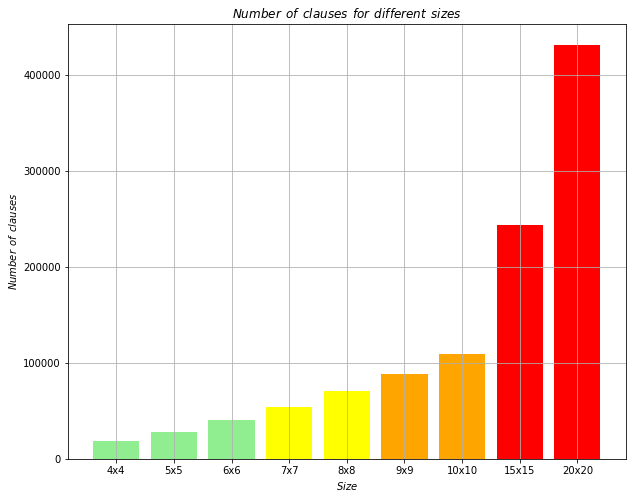

In [148]:
plt.figure(figsize=(10, 8))
plt.title("$Number \:\: of \:\: clauses \:\: for \:\: different \:\: sizes$")
plt.grid()
bars = ('4x4', '5x5', '6x6', '7x7', '8x8', '9x9', '10x10', '15x15', '20x20')
height = [numberOfClauses[key] for key in bars]
x_pos = [0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.xticks(x_pos, bars)
plt.xlabel("$Size$")
plt.ylabel("$Number \:\: of \:\: clauses$")
plt.bar(x_pos, height, color=['lightgreen','lightgreen','lightgreen','yellow','yellow','orange','orange','red','red'])
plt.savefig("bar.png")
plt.show()

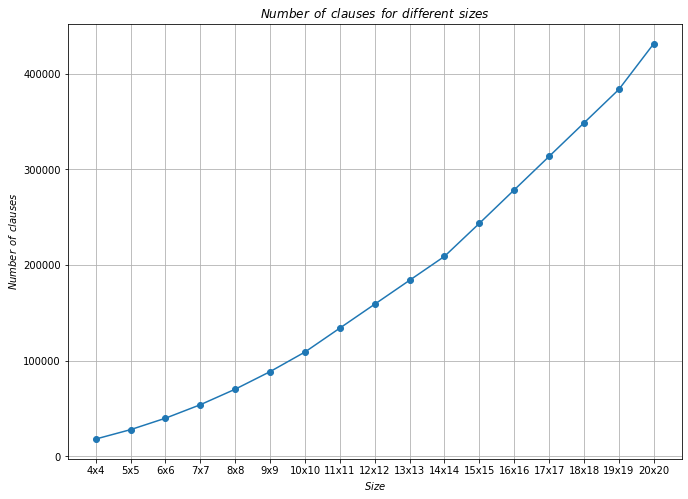

In [147]:
plt.figure(figsize=(11, 8))
plt.title("$Number \:\: of \:\: clauses \:\: for \:\: different \:\: sizes$")
plt.grid()
bars = ('4x4','5x5','6x6','7x7','8x8','9x9','10x10','11x11','12x12','13x13','14x14','15x15','16x16','17x17','18x18','19x19','20x20')
height = []
for i in range(len(bars)):
  if bars[i] in numberOfClauses:
    height.append(numberOfClauses[bars[i]])
  else:
    if i < 12:
      height.append(numberOfClauses[bars[6]]+(i-6)*25000)
    else:
      height.append(numberOfClauses[bars[11]]+(i-11)*35000)
plt.xlabel("$Size$")
plt.ylabel("$Number \:\: of \:\: clauses$")
plt.plot(bars, height, marker="o")
plt.savefig("plot.png")
plt.show()